#cats_vs_dogs Dataset (using Convolutional Neural Networks- CNN)
**AI-2020**: Advanced AI- Computer Vision

![](https://drive.google.com/uc?export=view&id=1x9fi6W2TYrqPCaOzT-jeJG-rjxr8X_5b)


<font color='black'>Robo-Geek Inc.</font> <font color='red'>Copyright December 14, 2024</font>


## AI-2020_Lab_3B
**LESSON 3**

**This lab uses the cats_vs_dogs dataset to learn about CNNs.**

In the previous lab, you created a new Notebook, for the following datasets:

oxford_flowers102

stanford_online_products

tf_flowers

Use the cats_vs_dogs Notebook as a template for your assignment.

**ASSIGNMENT AI-2020_Lab_3C:**

SELECT ONE DATASET TO GET THE TRAINING AND TESTING IN A NEW NOTEBOOK

**Modify each dataset according  to its information in the TensorFlow library**

**Display the first twelve and the last six images of the train and test data.**

**Save the dataset information in your local drive.


**LOADING cats_vs_dogs Dataset**

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul

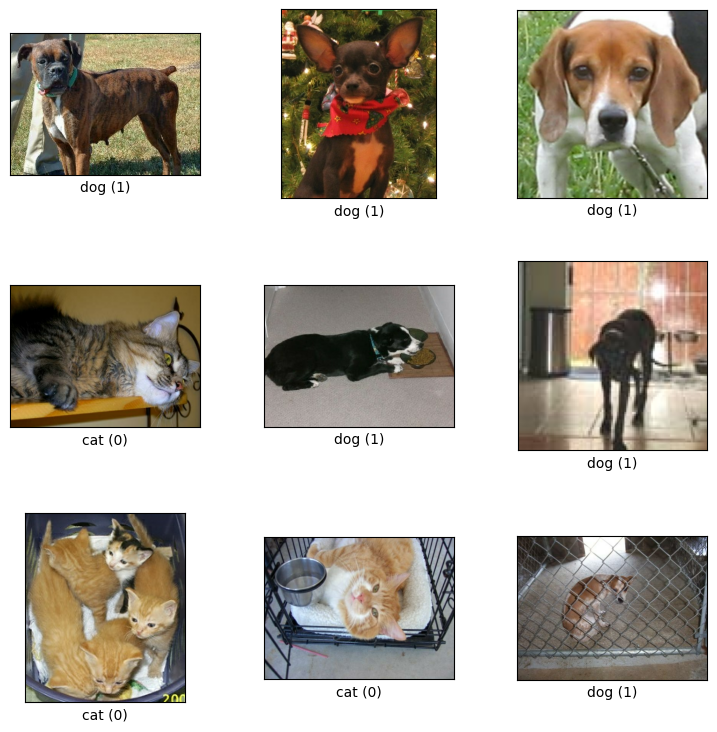

In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

ds, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

print(info) # Print dataset information

fig = tfds.show_examples(ds['train'], info) # Show examples

# MODIFYING DATASETS INFORMATION

The dataset cats_vs_dogs has 1738 corrupted files and only one data type,

train. The following code will divide the data into train and test

datasets using the split_ratio variable to scale the data.

You can use it to correct data in the other TensorFlow datasets

you will analyze.

**DISPLAYING NEW LABELS FROM THE Dataset cats_vs_dogs**

In [ ]:
import tensorflow.keras.backend as K
import tensorflow as tf

# Clear the TensorFlow session and reset the graph
K.clear_session()
tf.compat.v1.reset_default_graph()


In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

ds, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

print(info) # Print dataset information

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.U37IMZ_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir=PosixGPath('/tmp/tmp24e9k8dltfds'),
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-

In [ ]:
!ls

sample_data



Number of total records: 23262

 Training records:  2326

 Testing records:  232

 Batch size= 8


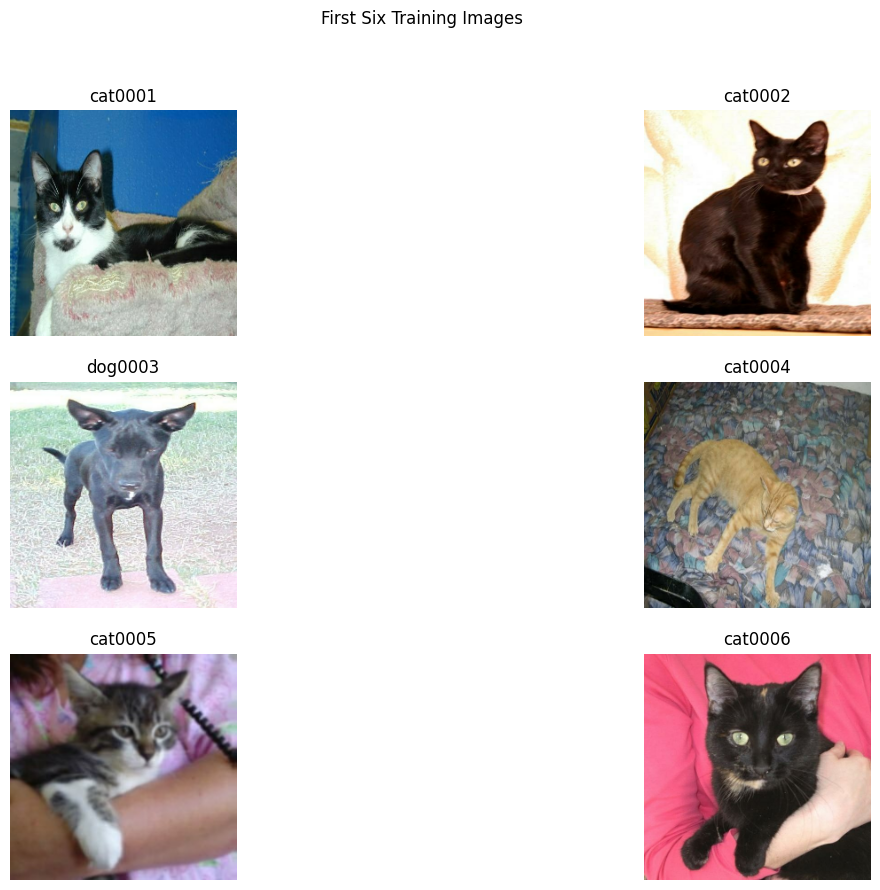

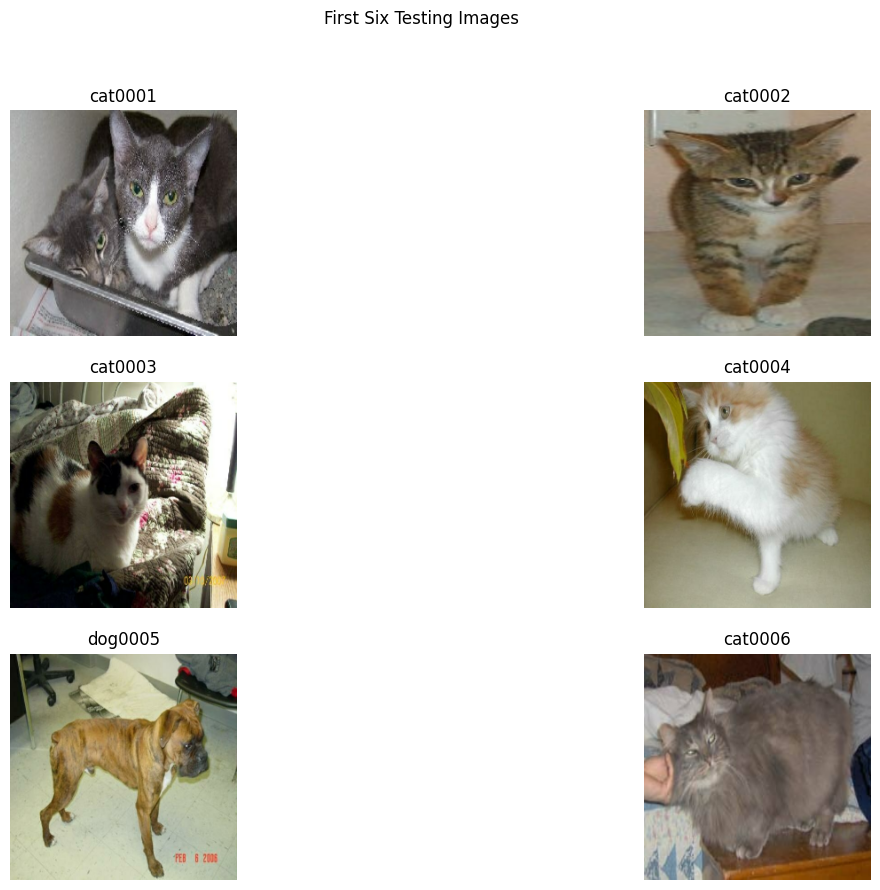

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import psutil
import os
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the cats_vs_dogs dataset
dataset_name = 'cats_vs_dogs'
#ds, info = tfds.load(dataset_name, with_info=True, as_supervised=True)

# Total number of examples
num_examples = info.splits['train'].num_examples
print(f'\nNumber of total records: {num_examples}')

# Splitting the dataset: 40% training and 10% testing
split_ratio = 0.1
num_train = int(num_examples * split_ratio)
num_test = int(num_examples * split_ratio * 0.1)
print('\n Training records: ', num_train)
print('\n Testing records: ', num_test)
train_dataset = ds['train'].take(num_train)
test_dataset = ds['train'].skip(num_train).take(num_test)

# Function to preprocess and resize images
def preprocess(image, label):
    image = tf.image.resize(image, (256, 256))  # Resize to your desired shape
    image = tf.cast(image, tf.float32) / 255.0  # Normalize the pixel values to [0, 1]
    return image, label

# Apply preprocessing
train_dataset = train_dataset.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Prefetching and batching the datasets
batch_size = 8
print('\n Batch size=', batch_size)
train_dataset = train_dataset.shuffle(num_train).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

# Assuming you have a list of class names for your dataset
label_names = ['cat', 'dog']

# Function to generate labels like cat0001, dog0001, etc.
def generate_label(label, index):
    class_name = label_names[label]
    return f"{class_name}{index:04d}"

# Function to display images from a dataset
def display_images(dataset, title, num_images):
    plt.figure(figsize=(15, 10))
    for images, labels in dataset.take(1):
        for i in range(num_images):
            image = images[i]  # Extract individual image from the batch
            # Rescale the image to 0-255 range
            image = image * 255.0
            plt.subplot(3, 2, i + 1)
            plt.imshow(image.numpy().astype("uint8"))
            plt.title(generate_label(labels[i].numpy(), i + 1))
            plt.axis('off')
    plt.suptitle(title)
    plt.show()

image_shape = (256, 256, 3)
display_images(train_dataset, 'First Six Training Images', 6)
display_images(test_dataset, 'First Six Testing Images', 6)




**ASSIGNMENT:**

SELECT ONE DATASET TO GET THE TRAINING AND TESTING IN A NEW NOTEBOOK

# TRAINING THE MODEL FOR cats_vs_dogs
# with split_ratio =0.1

**LAB_3C**

In [ ]:
# Define a simple CNN model
print('\nStarting the CNN cats_vs_dogs model')
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 classes: cat and dog
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs=10

def print_and_clear_memory_usage():
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    print(f"RSS: {mem_info.rss / (1024 ** 2):.2f} MB, VMS: {mem_info.vms / (1024 ** 2):.2f} MB")
    K.clear_session()
    tf.compat.v1.reset_default_graph()

# Train the model with checkpointing and memory clearing
checkpoint_cb = ModelCheckpoint('cats_vs_dogs_model_epoch_{epoch}.keras', save_best_only=False)
epochs = 10

# Example of using it in your training loop
for epoch in range(epochs):
    history = model.fit(train_dataset, validation_data=test_dataset, epochs=1, callbacks=[checkpoint_cb])
    print_and_clear_memory_usage()
    test_loss, test_acc = model.evaluate(test_dataset)
    print(f"Epoch: {epoch+1}, Test accuracy: {test_acc}")
    print_and_clear_memory_usage()

print(f"Test accuracy: {test_acc}")

# Save the model in Keras format
model_save_path = 'cats_vs_dogs_model.keras'
model.save(model_save_path, save_format='keras')
print(f"Model saved to {model_save_path}")


Starting the CNN cats_vs_dogs model
291/291 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.5111 - loss: 1.5932 - val_accuracy: 0.5560 - val_loss: 0.6885
RSS: 3737.33 MB, VMS: 16901.14 MB
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5639 - loss: 0.6865
Epoch: 1, Test accuracy: 0.556034505367279
RSS: 3749.67 MB, VMS: 16893.13 MB
291/291 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.5984 - loss: 0.6836 - val_accuracy: 0.6078 - val_loss: 0.6890
RSS: 4636.41 MB, VMS: 17541.14 MB
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6754 - loss: 0.6599
Epoch: 2, Test accuracy: 0.607758641242981
RSS: 4454.25 MB, VMS: 17277.13 MB
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.7369 - loss: 0.5516 - val_accuracy: 0.6681 - val_loss: 0.7137
RSS: 5517.37 MB, VMS: 18373.14 MB
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7262 - loss: 0.6794
Epoch: 3, Test accuracy: 0.6681034564971924
RSS: 4698.22 MB, VMS: 17533.13 MB
291/291 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accur

Epoch: 10, Test accuracy: 0.7155172228813171
RSS: 5870.23 MB, VMS: 18557.13 MB
Test accuracy: 0.7155172228813171
Model saved to cats_vs_dogs_model.keras
